In [1]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# load datasets
df_users = pd.read_csv(r"C:\Users\sanja\Downloads\bmi_dataset.csv")
df_foods = pd.read_excel(r"C:\Users\sanja\Downloads\data.xlsx")

In [3]:
# define function to get target label
def get_target_label(index):
    if index < 18.5:
        return 'Underweight'
    elif index >= 18.5 and index < 25:
        return 'Normal'
    elif index >= 25 and index < 30:
        return 'Overweight'
    elif index >= 30:
        return 'Obese'
    else:
        return 'Unknown'


In [4]:
# preprocess user data
df_users['Target'] = df_users['Index'].apply(get_target_label)
df_users['BMI'] = df_users['Weight'] / (df_users['Height'] / 100 ) ** 2

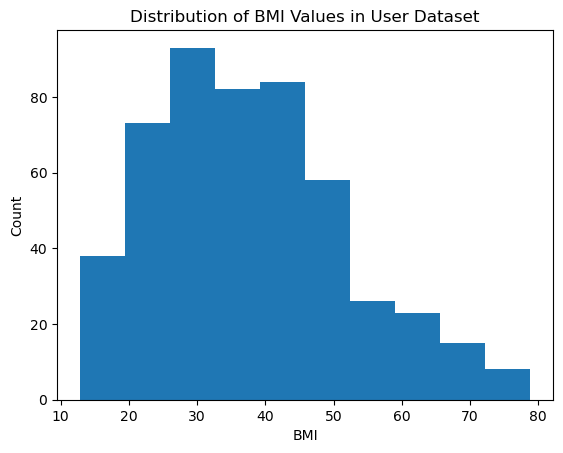

In [5]:
# plot distribution of BMI values
plt.hist(df_users['BMI'], bins=10)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI Values in User Dataset')
plt.show()

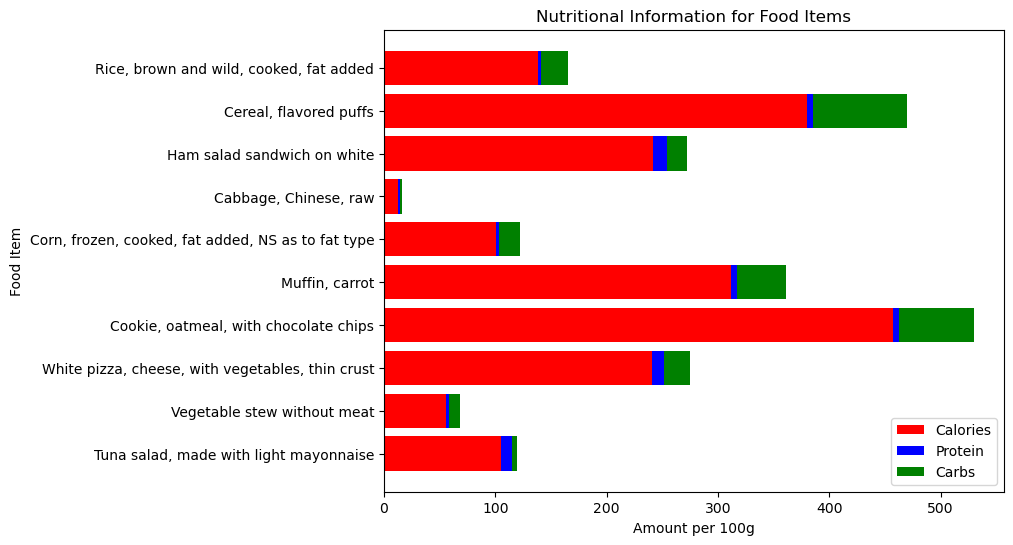

In [6]:
# create a sample data of random values in df_foods
df_sample_foods = df_foods.sample(n=10, random_state=50)


# create horizontal bar chart
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(df_sample_foods['Food'], df_sample_foods['Calories'], color='r', label='Calories')
ax.barh(df_sample_foods['Food'], df_sample_foods['Protein'], left=df_sample_foods['Calories'], color='b', label='Protein')
ax.barh(df_sample_foods['Food'], df_sample_foods['Carbs'], left=df_sample_foods['Calories']+df_sample_foods['Protein'], color='g', label='Carbs')
ax.set_xlabel('Amount per 100g')
ax.set_ylabel('Food Item')
ax.set_title('Nutritional Information for Food Items')
ax.legend()
plt.show()

In [7]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_users[['Weight', 'Height']], df_users['BMI'], test_size=0.2, random_state=42)


In [8]:

# train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
# define function to get recommended foods based on predicted BMI
def recommend_foods(weight, height, target):
    # predict user's BMI
    bmi = model.predict([[weight, height]])[0]
    
    # get target label
    target_label = get_target_label(target)
    
    
    # filter users by target label
    df_users_filtered = df_users[df_users['Target'] == target_label]
    # fit KNN model
    model_knn = NearestNeighbors(n_neighbors=10)
    model_knn.fit(df_users_filtered[['BMI']])
    
    # find K nearest neighbors
    distances, indices = model_knn.kneighbors([[bmi]])
    
    # get recommended foods based on KNN results
    recommended_foods = df_foods.iloc[indices[0]][['Food', 'Calories', 'Protein', 'Carbs']]
    
    return recommended_foods, bmi, target_label


Enter your weight in kg: 70
Enter your height in cm: 170
Enter your target (1 for Gain weight, 2 for Maintain weight, 3 for Lose weight): 1


C:\Users\sanja\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sanja\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


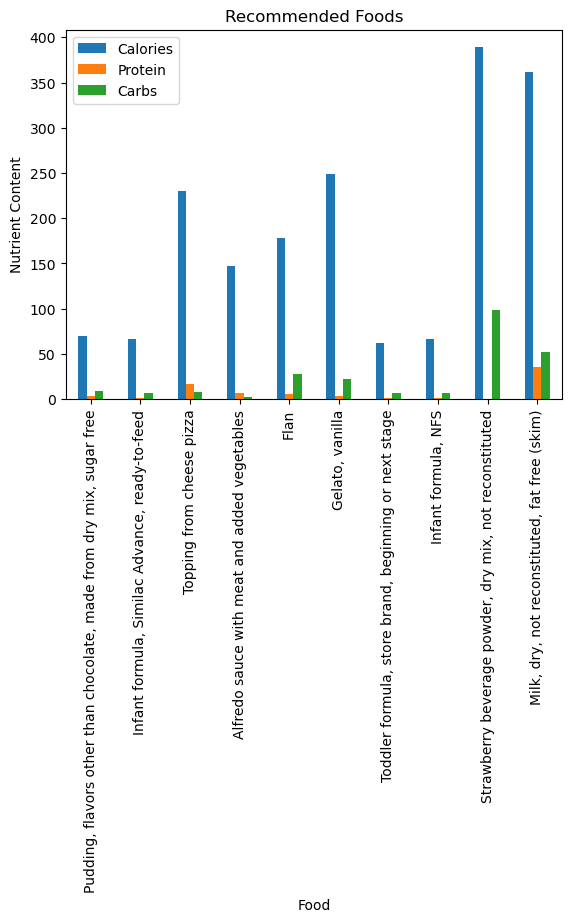

Recommended foods based on your BMI of  24.981043333212277
                                                                Food  Calories  Protein  Carbs
Pudding, flavors other than chocolate, made from dry mix, sugar free        70     3.18   9.53
                      Infant formula, Similac Advance, ready-to-feed        66     1.37   6.87
                                           Topping from cheese pizza       230    16.86   7.62
                        Alfredo sauce with meat and added vegetables       147     6.63   1.95
                                                                Flan       178     5.23  28.24
                                                     Gelato, vanilla       249     3.50  22.29
               Toddler formula, store brand, beginning or next stage        62     1.72   6.57
                                                 Infant formula, NFS        66     1.38   7.12
              Strawberry beverage powder, dry mix, not reconstituted       389     0.1

In [13]:
# user input
weight = float(input("Enter your weight in kg: "))
height = float(input("Enter your height in cm: "))
target = int(input("Enter your target (1 for Gain weight, 2 for Maintain weight, 3 for Lose weight): "))

# get recommended foods
recommended_foods, bmi, target_label = recommend_foods(weight, height, target)

# create bar plot recommended foods
recommended_foods.plot(x='Food', y=['Calories', 'Protein', 'Carbs'], kind='bar')
plt.xlabel('Food')
plt.ylabel('Nutrient Content')
plt.title('Recommended Foods')
plt.show()


# display recommended foods in table
print("Recommended foods based on your BMI of ", bmi)
#print(recommended_foods[0])
print(recommended_foods.to_string(index=False))

In [14]:

# make predictions on test set
y_pred = model.predict(X_test)

# calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# print results
print('MSE:', mse)
print('MAE:', mae)

# print MSE
print("Mean Squared Error:", mse)

MSE: 6.635522813573632
MAE: 1.8985225797565675
Mean Squared Error: 6.635522813573632


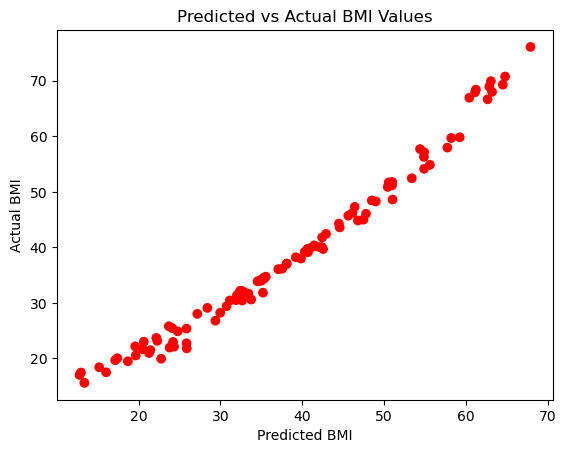

In [15]:

# make predictions on test set
y_pred = model.predict(X_test)

# create scatter plot
plt.scatter(y_pred, y_test, c=['red' if pred != actual else 'blue' for pred, actual in zip(y_pred, y_test)])
plt.xlabel('Predicted BMI')
plt.ylabel('Actual BMI')
plt.title('Predicted vs Actual BMI Values')
plt.show()


In [16]:
r2_score = model.score(X_test, y_test)
print('R2 score:', r2_score)

R2 score: 0.9711983365789291
